# Nonlinear Optimization
This notebook provides a starter code for an implementation of nonlinear optimization methods for an objective function.

Please add this notebook to your Google Drive and complete all designated sections accrodingly.

It is best to create a folder in your Google Drive to hold your Colaboratory assignments. Please include your .ipynb file with your assignment submission.

#Headers
Feel free to add any headers here.

In [ ]:
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

# Objective Function
Modify the "objective" function using the following equation.

$$f(x,y) = 4x^{2} + \dfrac{(y+3)^2}{15}$$

In [ ]:
def objective(x, y):
	# <<TODO#1>> modify the objective function
	return (4*x**2.0) + (((y+3)**2.0)/15)

# Gradient of objective function
Modify the "gradient" function accordingly. 

In [ ]:
def gradient(x, y):
	# <<TODO#2>> modify the gradient function
	return asarray([(8.0*x), ((2/15)*(y+3))])

#Part a: Plot the objective function
Use the following block to plot the objective function. Please do not modify it.

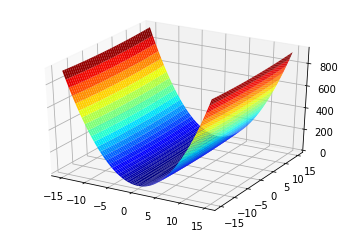

In [ ]:
# define range for input
bounds = asarray([[-15.0, 15.0], [-15.0, 15.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# Figure 1
# create a surface plot with the jet color scheme
figure_1 = pyplot.figure(1)
axis = figure_1.gca(projection='3d')
axis.plot_surface(x, y, objective(x, y), cmap='jet')

#Part b: Basic Gradient Descent


## b.1. Set Parameters
You may change the following parameters.

In [ ]:
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2

##b.2. Gradient Descent Function
Modify the following function to implement a basic gradient descent approach.

In [ ]:
def gradient_descent(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# run the gradient descent
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		solutions.append(p.copy())
		# calculate gradient
		g = gradient(p[0], p[1])
		# build solution
		new_p = list()
		for i in range(g.shape[0]):
			# calculate the new position in this variable
			value = p[i] - gamma_t * g[i]
			new_p.append(value)
		# store the new solution
		p = asarray(new_p)
		# evaluate candidate point
		score = objective(p[0], p[1])
	return solutions

##b.3. Solve the Problem using Gradient Descent
Use the following block to solve the problem. Please do not modify it.

In [ ]:
# perform the gradient descent search
solutions = gradient_descent(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([6.         9.65333333]) = 154.67379
>2 f([-3.6         9.31591111]) = 61.95211
>3 f([2.16       8.98748681]) = 28.24239
>4 f([-1.296      8.6678205]) = 15.79433
>5 f([0.7776     8.35667862]) = 11.01692
>6 f([-0.46656     8.05383386]) = 9.01653
>7 f([0.279936   7.75906495]) = 8.03062
>8 f([-0.1679616   7.47215655]) = 7.42392
>9 f([0.10077696 7.19289905]) = 6.96697
>10 f([-0.06046618  6.92108841]) = 6.57649
>11 f([0.03627971 6.65652605]) = 6.22183
>12 f([-0.02176782  6.39901869]) = 5.89133
>13 f([0.01306069 6.14837819]) = 5.58020
>14 f([-0.00783642  5.90442144]) = 5.28616
>15 f([4.70184985e-03 5.66697020e+00]) = 5.00785
>16 f([-2.82110991e-03  5.43585099e+00]) = 4.74427
>17 f([1.69266594e-03 5.21089497e+00]) = 4.49460
>18 f([-1.01559957e-03  4.99193777e+00]) = 4.25808
>19 f([6.09359740e-04 4.77881943e+00]) = 4.03400
>20 f([-3.65615844e-04  4.57138424e+00]) = 3.82172
>21 f([2.19369506e-04 4.36948066e+00]) = 3.62062
>22 f([-1.31621704e-04  4.17296118e+00])

##b.4. Plot results for Basic Gradient Descent
Use the following block to plot the results. Please do not modify it.

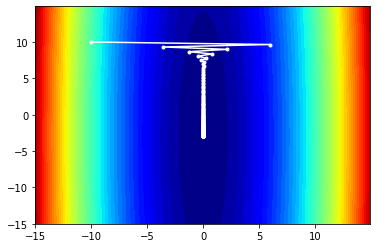

In [ ]:
# Figure 2
# create a filled contour plot with 50 levels and jet color scheme
figure_2 = pyplot.figure(2)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part c: Adaptive Gradient (AdaGrad)

##c.1. Set Parameters
You may change the following parameters.

In [ ]:
# define the total iterations
n_iter = 200
# define the step size
gamma_t = 0.3

##c.2. AdaGrad Function
Modify the following function to implement the AdaGrad approach.

In [ ]:
def adagrad(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# initialize the preconditioner
	D = [0.0 for _ in range(bounds.shape[0])]
	# run the AdaGrad
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		solutions.append(p.copy())
		# calculate gradient
		g = gradient(p[0], p[1])
		# update the sum of the squared partial derivatives
		for i in range(g.shape[0]):
			D[i] += g[i]**2.0
		# build solution
		new_p = list()
		for i in range(g.shape[0]):
			# calculate the learning rate for this variable
			alpha = gamma_t / (sqrt(D[i]))
			# calculate the new position in this variable
			value = p[i] - alpha * g[i]
			new_p.append(value)
		# store the new solution
		p = asarray(new_p)
		# evaluate candidate point
		score = objective(p[0], p[1])
	return solutions

##c.3. Solve the Problem using AdaGrad
Use the following block to solve the problem. Please do not modify it. 

In [ ]:
# perform the AdaGrad search
solutions = adagrad(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([-9.7  9.7]) = 387.11267
>2 f([-9.49112262  9.4903585 ]) = 370.72624
>3 f([-9.32221523  9.32043852]) = 357.73433
>4 f([-9.17703434  9.17411785]) = 346.75245
>5 f([-9.04800808  9.0438719 ]) = 337.13612
>6 f([-8.93089036  8.92547796]) = 328.52435
>7 f([-8.82302017  8.81628838]) = 320.69105
>8 f([-8.72260039  8.71451446]) = 313.48369
>9 f([-8.62835017  8.618881  ]) = 306.79360
>10 f([-8.5393186   8.52844111]) = 300.54018
>11 f([-8.45477679  8.44246889]) = 294.66168
>12 f([-8.3741515   8.36039337]) = 289.10956
>13 f([-8.29698222  8.28175584]) = 283.84486
>14 f([-8.22289243  8.20618121]) = 278.83574
>15 f([-8.15156957  8.1333581 ]) = 274.05579
>16 f([-8.08275079  8.06302467]) = 269.48281
>17 f([-8.01621258  7.9949582 ]) = 265.09793
>18 f([-7.95176292  7.92896743]) = 260.88496
>19 f([-7.88923548  7.86488662]) = 256.82986
>20 f([-7.82848497  7.80257103]) = 252.92041
>21 f([-7.76938365  7.7418934 ]) = 249.14584
>22 f([-7.71181847  7.6827411 ]) = 245.49664
>23 f

## c.4. Plot results for AdaGrad
Use the following block to plot the results. Please do not modify it.

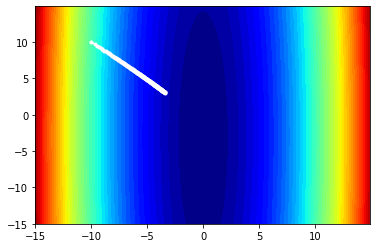

In [ ]:
# Figure 3
# create a filled contour plot with 50 levels and jet color scheme
figure_3 = pyplot.figure(3)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the sample as black circles
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part d: Adam

##d.1. Set Parameters
You may change the following parameters.

In [ ]:
eps=1e-8
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2
# factor for average gradient
alpha = 0.8
# factor for average squared gradient
beta = 0.999

##d.2. Adam Function
Modify the following function to implement the Adam approach.

In [ ]:
def adam(objective, derivative, bounds, n_iter, gamma_t, alpha, beta, eps):
	solutions = list()
	# generate an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	D = [0.0 for _ in range(bounds.shape[0])]
	# run the Adam updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(p[0], p[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = alpha * m(t-1) + (1 - alpha) * g(t)
			m[i] = alpha * m[i] + (1.0 - alpha) * g[i]
			# D(t) = beta * D(t-1) + (1 - beta) * g(t)^2
			D[i] = beta * D[i] + (1.0 - beta) * g[i]**2
			# mhat(t) = m(t) / (1 - alpha(t))
			mhat = m[i] / (1.0 - alpha**(t+1))
			# vhat(t) = v(t) / (1 - beta(t))
			Dhat = D[i] / (1.0 - beta**(t+1))
			# x(t) = x(t-1) - gamma_t * mhat(t) / (sqrt(Dhat(t)) + eps)
			# x[i] = x[i] - gamma_t * mhat / (sqrt(Dhat) + eps)
			p[i] = p[i] - gamma_t * mhat / (sqrt(Dhat) + eps)
		# evaluate candidate point
		score = objective(p[0], p[1])
		# keep track of solutions
		solutions.append(p.copy())
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
	return solutions

##d.3. Solve the Problem using Adam
Use the following block to solve the problem. Please do not modify it. 

In [ ]:
# perform the adam search
solutions = adam(objective, gradient, bounds, n_iter, gamma_t, alpha, beta, eps)
solutions = asarray(solutions)

>0 f([-9.800000000025, 9.800000001153846]) = 395.08267
>1 f([-9.600233648425537, 9.600177496562566]) = 379.24224
>2 f([-9.400860419528383, 9.400652492838217]) = 363.75645
>3 f([-9.202040562245386, 9.201544740233706]) = 348.63538
>4 f([-9.003933523005788, 9.002972567604546]) = 333.88803
>5 f([-8.806696452713394, 8.805051800220465]) = 319.52223
>6 f([-8.610482841762948, 8.607894791597506]) = 305.54454
>7 f([-8.41544131777546, 8.411609592775593]) = 291.96027
>8 f([-8.221714629998297, 8.216299273942434]) = 278.77339
>9 f([-8.02943883326495, 8.022061404769815]) = 265.98661
>10 f([-7.838742673927721, 7.828987691951567]) = 253.60135
>11 f([-7.649747170982363, 7.637163765721119]) = 241.61781
>12 f([-7.462565378177407, 7.446669101895185]) = 230.03505
>13 f([-7.277302307476787, 7.257577062362983]) = 218.85104
>14 f([-7.094054990834527, 7.069955034875544]) = 208.06273
>15 f([-6.912912655682834, 6.8838646523207165]) = 197.66616
>16 f([-6.733956989550001, 6.699362072150825]) = 187.65655
>17 f([-6.5

## d.4. Plot results for Adam
Use the following block to plot the results. Please do not modify it.

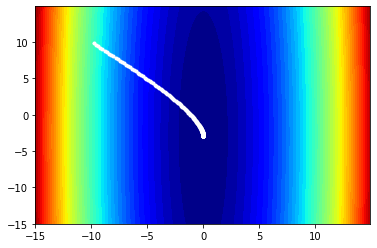

In [ ]:
# Figure 4
# create a filled contour plot with 50 levels and jet color scheme
figure_4 = pyplot.figure(4)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()